## Covid-19 cases in England

from https://coronavirus.data.gov.uk/details/download

In [1]:
import requests, bs4, os
import numpy as np
import requests
import pandas as pd
from datetime import date

def convDate(dateString):
    year = int(dateString[:4])
    month = int(dateString[5:7])
    day = int(dateString[8:])
    
    return date(year, month, day)

In [2]:
link = "https://api.coronavirus.data.gov.uk/v2/data?areaType=nation&areaCode=E92000001&metric=newCasesByPublishDate&format=csv"

resp = requests.get(link)

# Store the data in a temporary file
tempfile = open('tempfile.csv', 'wb')
tempfile.write(resp.content)
tempfile.close()

sheet = pd.read_csv('tempfile.csv')
sheetDates = sheet["date"].values

dates = np.asarray([convDate(item) for item in sheet["date"].values])
cases = sheet["newCasesByPublishDate"].values

os.remove("tempfile.csv")

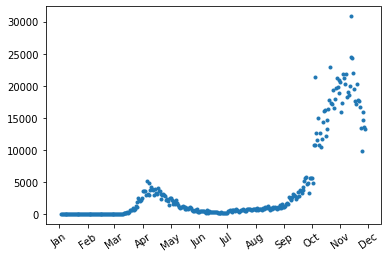

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot_date(dates, cases, marker = ".")
#plt.yscale("log")
ax.xaxis.set_tick_params(rotation=35)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

In [29]:
convDate(dates[0])